In [1]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, visualize_transition,plot_histogram
from qiskit_aer import AerSimulator
from qiskit import transpile
import numpy as np
from qiskit import QuantumCircuit

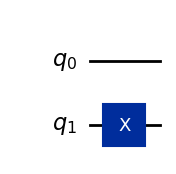

In [2]:
#Create a constant oracle, input has no effect on the output
#Create a quantum circuit with two qubits
constant_oracle=QuantumCircuit(2)

#get a random number from 0 or 1
output=np.random.randint(2)

#whatever get input,its having no effect.
#the output will be the random value o0 or 1.
if output== 1:
    constant_oracle.x(1)

#draw the circuit
constant_oracle.draw('mpl')

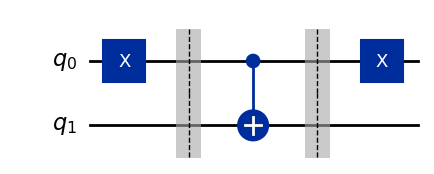

In [3]:
#Creating a balanced oracle function, input has effect on the output
#perform cnot with first as control and second as target
balanced_oracle=QuantumCircuit(2)

#Place x-gate for input qubit
balanced_oracle.x(0)

#Use barrier as divided(only representatio)
balanced_oracle.barrier()

#Place cnot
balanced_oracle.cx(0,1)

#USing barrier as a divider and avoid cancelling gate by the transpiller
balanced_oracle.barrier()

#Place x gate
balanced_oracle.x(0)

#Show oracle
balanced_oracle.draw('mpl')

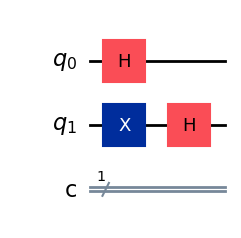

In [4]:
#initialize input qubits in the state /+> and 
#the output qubit in the state /->
dj_circuit=QuantumCircuit(2,1)

#Apply H gates
dj_circuit.h(0)

#Put qubit in state |->
dj_circuit.x(1)
dj_circuit.h(1)
dj_circuit.draw('mpl')

In [5]:
#Calling oracle function
oracle_fn = balanced_oracle
# oracle_fn = constant_oracle

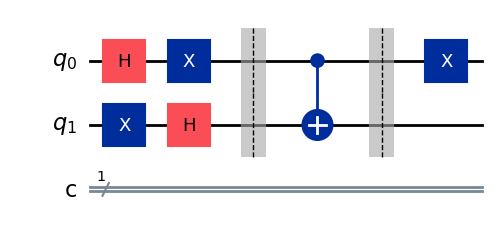

In [6]:
#Add oracle function
# dj_circuit += oracle_fn
dj_circuit = dj_circuit.compose(oracle_fn)
dj_circuit.draw('mpl')

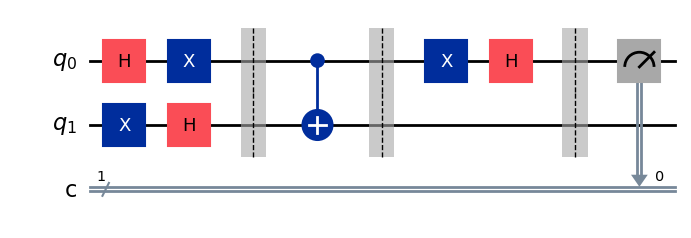

In [7]:
#Perform h gates on qubit and measure input register
dj_circuit.h(0)
dj_circuit.barrier()

#Measure
dj_circuit.measure(0,0)

#Display the circuit
dj_circuit.draw('mpl')

In [8]:
# # For execution
# simulator = AerSimulator()
# # compiled_circuit = transpile(dj_circuit)
# dj_circuit.measure_all()
# sim_result = simulator.run(dj_circuit).result()
# counts = sim_result.get_counts()
# plot_histogram(counts)